<a href="https://colab.research.google.com/github/gomes-ti23/AnaliseDados_Airbnb_LosAngeles_2023/blob/main/An%C3%A1lise_Dados_Airbnb_Los_Angeles_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Los Angeles - Atualizado até Dezembro - 2023*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Curso_Sigmoidal/relatórios/listings_LosAngeles.csv", index_col="id")

In [5]:
df.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
109,Condo in Culver City · 2 bedrooms · 2 beds · 2...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,129,30,2,2016-05-15,0.01,1,180,0,NaN
2708,Rental unit in Los Angeles · ★4.85 · 1 bedroom...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,94,30,40,2023-07-31,0.35,2,271,2,NaN
2732,Rental unit in Santa Monica · ★4.41 · 1 bedroo...,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,179,7,24,2022-08-21,0.16,2,360,0,228269
63416,Home in Hollywood · ★4.99 · 1 bedroom · 2 beds...,309512,Vincenzo,City of Los Angeles,Hollywood Hills,34.11344,-118.32399,Private room,220,2,161,2023-11-18,1.02,3,0,23,HSR21-000113
2864,Rental unit in Bellflower · 1 bedroom · 1 bed ...,3207,Bernadine,Other Cities,Bellflower,33.87490,-118.11515,Entire home/apt,50,30,0,NaN,NaN,1,0,0,NaN


### Análise de Dados

Nessa etapa será criado um dicionário das variáveis para melhor compreensão dos dados apresentados.

*   `id` - número de id gerado para identificar o imóvel
*   `name` - nome da propriedade anunciada
*   `host_id` - número de id do proprietário (anfitrião) da propriedade
*   `host_name` - nome do anfitrião
*   `neighbourhood_group` - grupo do bairro
*   `neighbourhood` - nome do bairro
*   `latitude` - coordenada da latitude da propriedade
*   `longitude` - coordenada da longitude da propriedade
*   `room_type` - informa o tipo de quarto que é oferecido
*   `price` - preço para alugar o imóvel
*   `minimum_nights` - quantidade mínima de noites para reservar
*   `number_of_reviews` - número de reviews que a propriedade possui
*   `last_review` - data do último review
*   `reviews_per_month` - quantidade de review por mês
*   `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
*   `availability_365` - número de dias de disponibilidade dentro de 365 dias
*   `number_of_reviews_ltm` - número de reviews dentro de 365 dias
*   `license` - imóvel possui licença.














### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
#Identificando o volume de dados do DataFrame
print("Entradas: \t {}".format(df.shape[0]))
print("Variáreis: \t {}".format(df.shape[1]))

#Verificando as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 	 45595
Variáreis: 	 17


name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [7]:
#Posso verificar também da seguinte forma, aproveitando e verificando se tem dados ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45595 entries, 109 to 1037702905074810033
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            45595 non-null  object 
 1   host_id                         45595 non-null  int64  
 2   host_name                       45575 non-null  object 
 3   neighbourhood_group             45595 non-null  object 
 4   neighbourhood                   45595 non-null  object 
 5   latitude                        45595 non-null  float64
 6   longitude                       45595 non-null  float64
 7   room_type                       45595 non-null  object 
 8   price                           45595 non-null  int64  
 9   minimum_nights                  45595 non-null  int64  
 10  number_of_reviews               45595 non-null  int64  
 11  last_review                     32948 non-null  object 
 12  reviews_per_mont

### **Qual a porcentagem de valores ausentes no *dataset*?**

In [8]:
# ordenar em ordem descrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.737493
reviews_per_month                 0.277377
last_review                       0.277377
host_name                         0.000439
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
name                              0.000000
host_id                           0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
price                             0.000000
dtype: float64

# **Análise dos Dados Ausentes**

*   É possível observar que a `license` possui mais de 70% de dados ausentes.
*   E as colunas `reviews_per_month` e `last_review` possuem quase 30% de dados ausentes.
*   A coluna `host_name` têm aproximadamente 0,1% de valores nulos. Onde não tem significância para o projeto.

Portanto a variável `license` por ser uma do tipo categórica vou preencher com valor "NaN", pois muitas não possuem a licença documentada e será necessário outros dados. Por isso não efetuei a exclusão das linhas; Outra possibilidade seria a exclusão da coluna license para essa análise.

Já a variável `reviews_per_month` será preenchida pela mediana da coluna. E a variável `last_review` seus valores nulos será preenchida pela data 0000-00-00.





In [9]:
#Antes
df.isnull().sum()

name                                  0
host_id                               0
host_name                            20
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       12647
reviews_per_month                 12647
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           33626
dtype: int64

In [10]:
#Preencher valores ausentes pela mediana da coluna
review_median = df.reviews_per_month.median()
df = df.fillna({"reviews_per_month": review_median})

In [11]:
#Preenche valores ausentes por 0000-00-00
df = df.fillna({"last_review": '0000-00-00'})

In [12]:
#Preenche os valores com NaN nos valores ausentes.
df = df.fillna({"license": 'NaN'})

In [13]:
#ver os valores ausentes DEPOIS
df.isnull().sum()

name                               0
host_id                            0
host_name                         20
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
license                            0
dtype: int64

### **Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição, irei plotar um histograma.

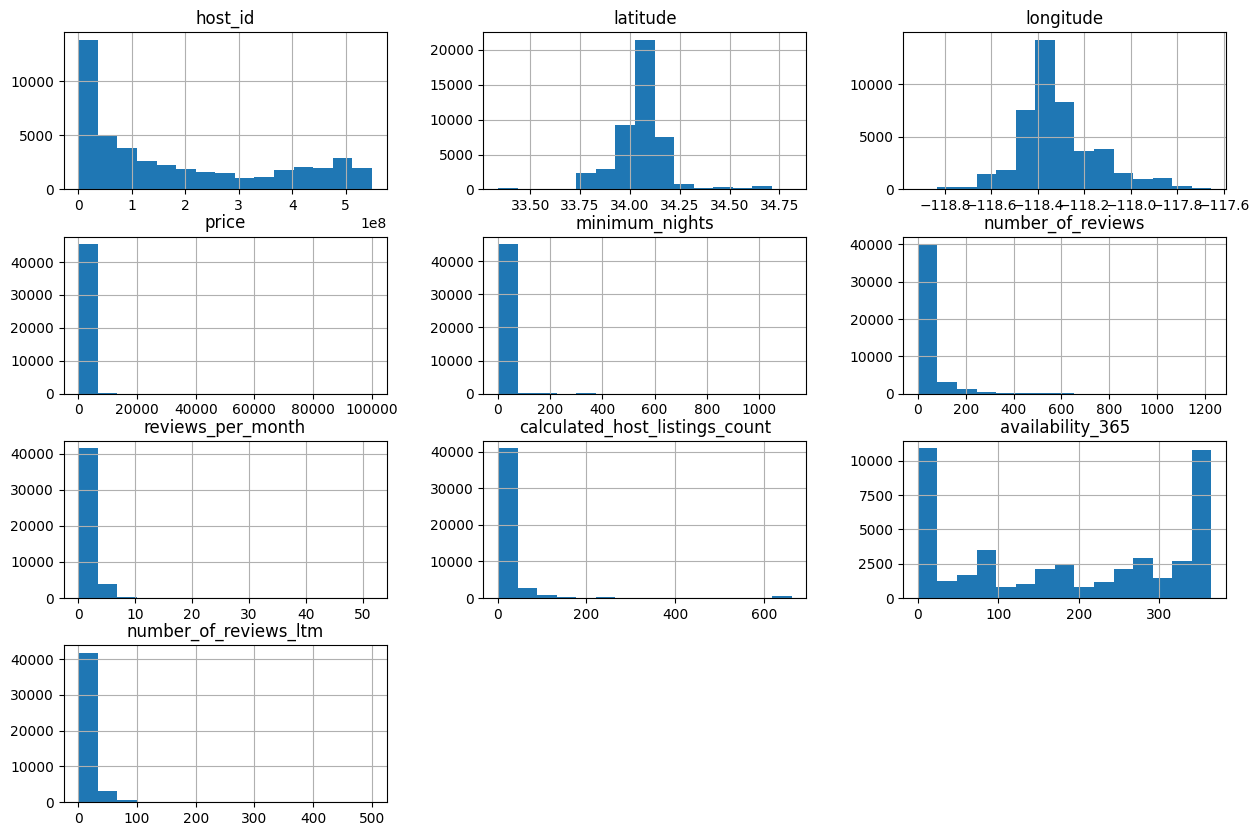

In [14]:
#plotar o histograma das variáveis numéricas.
df.hist(bins=15, figsize=(15,10));

## É possível notar a presença de Outliers!!!

*   As variáveis `price`, `minimum_nights` e `calculated_host_listings_count` contém a presença dos outliers

Para essa confirmação farei um resumo estatístico por meio do `describe()` e plotar um `boxplot` para a variável.



In [15]:
# ver o resumo estatístico das variáveis
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
    'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,45595.000000,45595.000000,45595.000000,45595.000000,45595.000000,45595.000000
mean,292.428117,17.647023,33.515144,1.250909,22.505297,185.083979
std,1034.911930,27.886409,73.784307,1.477087,82.546342,141.429563
min,5.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,90.000000,2.000000,0.000000,0.350000,1.000000,32.000000
50%,148.000000,7.000000,5.000000,0.760000,2.000000,179.000000
75%,249.000000,30.000000,31.000000,1.510000,10.000000,337.000000
max,99999.000000,1124.000000,1227.000000,51.550000,662.000000,365.000000


##Olhando o resumo podemos afirmar as seguintes hipóteses

*   A variável `price` possui 75% do valor abaixo de 249, porém o seu valor máximo é 99999 (outliers).
*   A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.



# BoxPlot para o `minimum_nights`

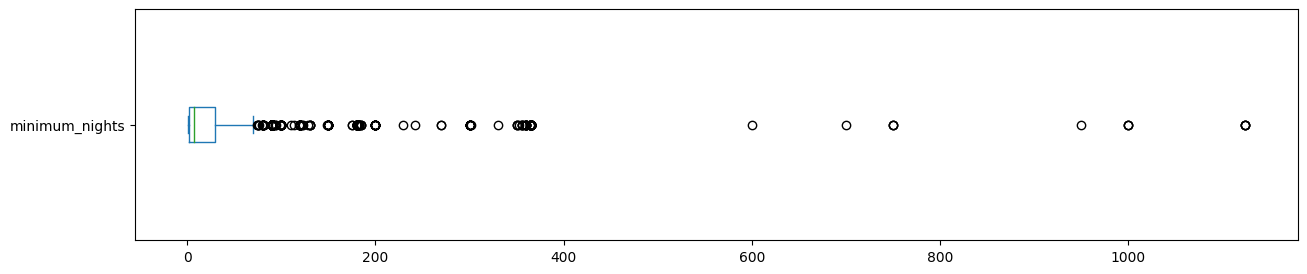

minimum_nights - valores acima de 30 dias: 
5483 entradas
12.0254%


In [16]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights - valores acima de 30 dias: ")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

## BoxPlot para `Price`

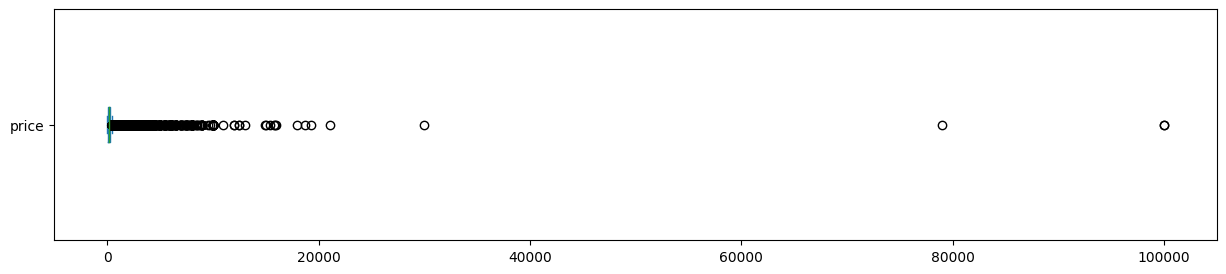


price - valores  acima de 1000
1658 entradas
3.6364%


In [17]:
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

#ver a quantidade de valores acima de 1000 para price
print("\nprice - valores  acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0]) * 100))

## Agora irei retirar os outliers, limpando o DataFrame das variáveis `price` e `minimum_nights` para plotar novamente o histograma.

In [18]:
# removendo os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


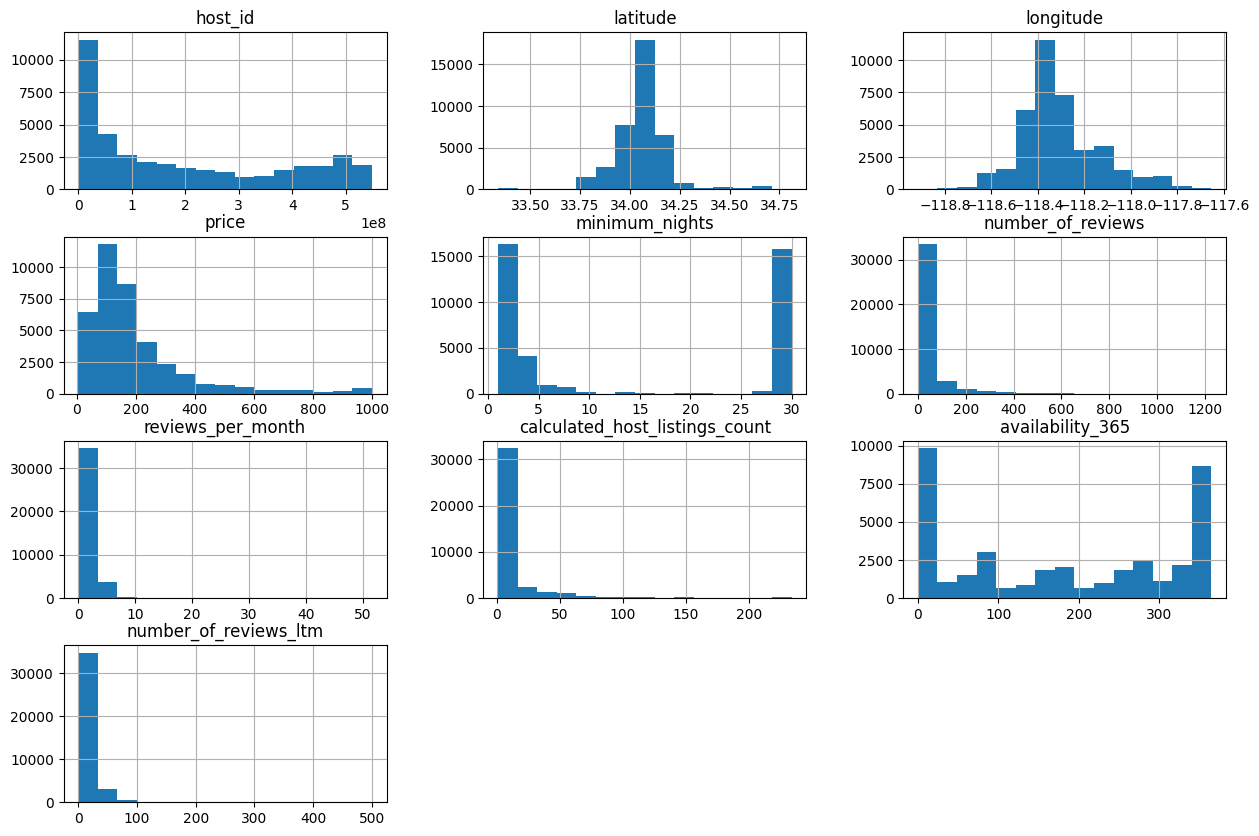

In [19]:
#plotar o novo histograma com as variáveis númericas
df_clean.hist(bins=15, figsize=(15,10));

### **Qual a média dos preços de aluguel?**

In [20]:
#Verificando a média da coluna price
price_media = df_clean.price.mean()
print(f"A média de preços doa alugueis em 2023 na cidade de Los Angeles foi de {price_media:.2f}")

A média de preços doa alugueis em 2023 na cidade de Los Angeles foi de 197.42


### **Qual a correlação existente entre as variáveis**

Para essa solução estarei medido essa correlação através da função do coeficiente de correlação, no qual estabelece um grau de intesidade dessa correlação.

*   Para isso irei fazer uma matriz de correlação.
*   Gerar um heetmap a parti dessa matriz.



In [21]:
# criando uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.043883,-0.068409,-0.043269,0.234918,0.054721
minimum_nights,-0.043883,1.000000,-0.190835,-0.412264,-0.015394,0.036168
number_of_reviews,-0.068409,-0.190835,1.000000,0.597788,-0.113578,-0.071120
reviews_per_month,-0.043269,-0.412264,0.597788,1.000000,-0.083063,-0.085376
calculated_host_listings_count,0.234918,-0.015394,-0.113578,-0.083063,1.000000,0.108755
availability_365,0.054721,0.036168,-0.071120,-0.085376,0.108755,1.000000


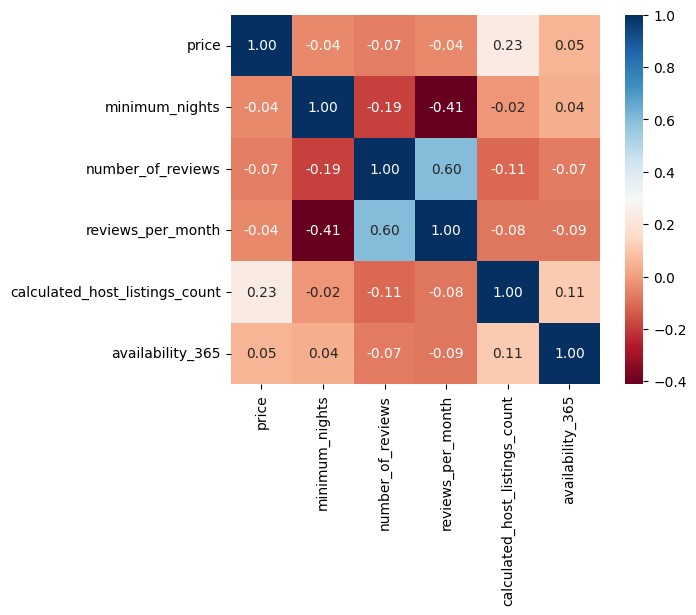

In [22]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='White', annot=True);

* Conclui-se que as variáveis `number_of_reviews` e `reviews_per_month` possuem uma correlação positiva, já que quando uma aumenta a outra também irá aumentar. Como a quantidade de review no mês irá aumentar, a quantidade de reviews da propriedade também.

* Temos também uma pequena correlação negativa entre as variáveis `minimum_nights` e `reviews_per_month`. Onde quanto menor a quantidade de dias mínimos para reserva for, maior a quantidade de reviews no mês. Podemos perceber que imóveis que possuem quantidades de dias menores à ser reservados devem receber maior quantidade de clientes no mês, gerando assim maior quantidades de reviews.



### **Qual o tipo de imóvel mais alugado no Airbnb?**

In [23]:
#mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    27899
Private room        9955
Shared room          691
Hotel room            59
Name: room_type, dtype: int64

In [24]:
#monstrando a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    72.269713
Private room       25.787483
Shared room         1.789970
Hotel room          0.152834
Name: room_type, dtype: float64

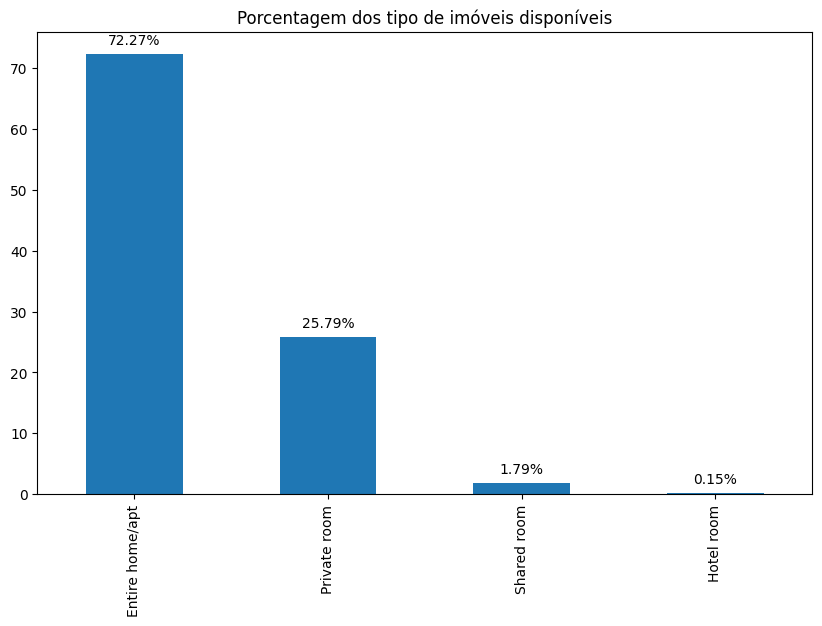

In [53]:
#fazendo um histograma para melhor visualização
imovel_hist = df_clean.room_type.value_counts() / df_clean.shape[0] * 100

ax = imovel_hist.plot(kind='bar', figsize=(10, 6))

plt.title('Porcentagem dos tipo de imóveis disponíveis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### **Qual a localidade mais cara do dataset?**



Para verificar uma variável em relação a outra usarei o `groupby()`

In [43]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:-10]

neighbourhood
Malibu                504.703846
Granada Hills         499.117647
Bel-Air               468.515152
Beverly Crest         453.048077
Canoga Park           424.969466
                         ...    
Bell                   99.529412
Florence-Firestone     95.825000
Adams-Normandie        95.473684
Boyle Heights          95.380000
Harvard Park           94.583333
Name: price, Length: 256, dtype: float64

## O bairro mais caro de acordo com a média é Malibu. Bairro com vista para mar, justificando o seu preço alto.

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [27]:
#ver a média da coluna (minimum_nights)
media_min = df_clean.minimum_nights.mean()
print(f'A média de noites mínimas disponíveis para aluguel em Los Angeles é de {media_min:.2f}')

A média de noites mínimas disponíveis para aluguel em Los Angeles é de 13.81


In [51]:
# Média mínima de reserva por cada bairro
df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)


neighbourhood
South Diamond Bar    30.000000
University Park      30.000000
South Park           30.000000
Watts                28.619048
Adams-Normandie      28.500000
                       ...    
Val Verde             1.428571
Bell                  1.411765
Sun Village           1.333333
Vernon                1.274419
Hasley Canyon         1.000000
Name: minimum_nights, Length: 266, dtype: float64

## Verificando a média mínima de reserva nos 3 bairros que possuem os maiores preços médios.

In [47]:
bairros_selecionados = ['Malibu', 'Granada Hills', 'Bel-Air']
df_bairros_selecionados = df_clean[df_clean['neighbourhood'].isin(bairros_selecionados)]

media_selecionados = df_bairros_selecionados.groupby('neighbourhood')['minimum_nights'].mean()

print(f'Média mínima de reserva por 3 bairros mais caros: {media_selecionados}')

Média mínima de reserva por 3 bairros mais caros: neighbourhood
Bel-Air          24.090909
Granada Hills    20.686275
Malibu            9.369231
Name: minimum_nights, dtype: float64


## Verificando também a média mínima de reserva em 3 bairros com menores preços médios.

In [46]:
bairros_selecionados = ['Harvard Park', 'Boyle Heights', 'Adams-Normandie']
df_bairros_selecionados = df_clean[df_clean['neighbourhood'].isin(bairros_selecionados)]

media_selecionados = df_bairros_selecionados.groupby('neighbourhood')['minimum_nights'].mean()

print(f'Média mínima de reserva por 3 bairros mais baratos: {media_selecionados}')

Média mínima de reserva por 3 bairros mais baratos: neighbourhood
Adams-Normandie    28.500000
Boyle Heights      24.100000
Harvard Park        8.833333
Name: minimum_nights, dtype: float64


# Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude` em relação ao preço (`price`).

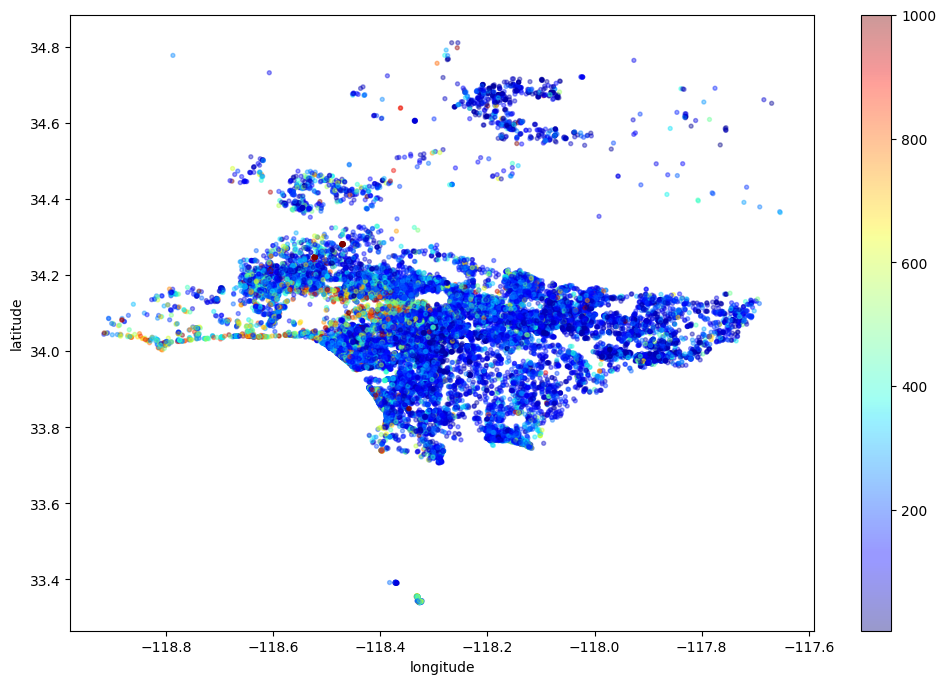

In [29]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita uma análise na base de dados com intuito de entender sobre os melhores bairros, preços e quantidade mínimas para aloção nos imóveis de Los Angeles.
Notou-se que o preço médio geral para alocação é de US$197,42 e que a quantidade média mínima para alocação é de praticamente 14 dias.

Foi realizado também uma análise da média mínima de dias para reserva entre 3 bairros com maiores preços médios e os 3 menores. Concluir que não há tanta diferença entre esse bairros, já que o bairro mais caro (`Malibu`) e o mais barato (`Harvard Park`) possuem média praticamente iguais, de 9 dias mínimos para reserva.

Vários outros insights estão disponíveis no próprio código em formato markdown.

